**Mount google drive**

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load data and exploration**

In [70]:
df = pd.read_csv('/content/drive/MyDrive/bank-data/bank-data/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [71]:
df.shape

(45211, 17)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [73]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [74]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Separate train, test and validation data**

In [75]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [76]:
print('train_df.shape : ', train_df.shape)
print('val_df.shape : ', val_df.shape)
print('test_df.shape : ', test_df.shape)

train_df.shape :  (27126, 17)
val_df.shape :  (9042, 17)
test_df.shape :  (9043, 17)


In [77]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'y'

In [78]:
print(input_cols)

['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [79]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [80]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [81]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [82]:
train_inputs

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
20326,technician,single,tertiary,no,1100,yes,yes,cellular,11,aug,67,1,-1,0,unknown
24301,entrepreneur,married,secondary,no,0,yes,yes,cellular,17,nov,258,1,-1,0,unknown
38618,blue-collar,married,secondary,no,3309,yes,no,cellular,15,may,349,2,-1,0,unknown
18909,housemaid,married,primary,no,2410,no,no,cellular,4,aug,315,1,-1,0,unknown
23081,self-employed,married,tertiary,no,3220,no,no,cellular,26,aug,74,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,services,single,secondary,no,167,no,yes,cellular,8,jul,606,2,-1,0,unknown
28829,technician,single,tertiary,no,693,no,no,cellular,30,jan,427,1,-1,0,unknown
3844,technician,divorced,secondary,no,0,yes,no,unknown,16,may,161,1,-1,0,unknown
15597,services,single,secondary,no,2311,no,yes,cellular,21,jul,1105,2,-1,0,unknown


In [83]:
train_targets

20326     no
24301     no
38618     no
18909     no
23081     no
        ... 
13264     no
28829     no
3844      no
15597    yes
22987     no
Name: y, Length: 27126, dtype: object

In [84]:
val_inputs

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
11019,services,divorced,secondary,no,-10,yes,no,unknown,17,jun,61,2,-1,0,unknown
3403,management,single,tertiary,no,1146,yes,no,unknown,15,may,98,2,-1,0,unknown
12260,management,married,tertiary,no,149,yes,no,unknown,23,jun,662,2,-1,0,unknown
45110,management,married,tertiary,no,8205,yes,no,telephone,25,oct,293,3,508,1,other
39549,management,married,tertiary,no,79,no,no,cellular,26,may,640,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17743,technician,married,secondary,no,356,no,no,cellular,29,jul,44,5,-1,0,unknown
12796,admin.,married,secondary,no,1604,no,yes,cellular,7,jul,625,1,-1,0,unknown
27107,admin.,married,secondary,no,857,yes,no,cellular,21,nov,169,1,92,20,other
2823,admin.,married,secondary,no,153,yes,no,unknown,14,may,159,2,-1,0,unknown


**Scaling numeric features**

In [85]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [86]:
train_inputs[numeric_cols].describe()

,balance,day,duration,campaign,pdays,previous
count,27126.000000,27126.000000,27126.00000,27126.000000,27126.000000,27126.000000
mean,1382.219531,15.837094,255.99377,2.772027,39.763327,0.572071
std,3077.844180,8.330251,255.73608,3.132857,99.753668,2.497945
min,-8019.000000,1.000000,0.00000,1.000000,-1.000000,0.000000
25%,70.000000,8.000000,102.00000,1.000000,-1.000000,0.000000
50%,445.000000,16.000000,179.00000,2.000000,-1.000000,0.000000
75%,1449.000000,21.000000,318.00000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.00000,63.000000,871.000000,275.000000


In [87]:
train_inputs[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [88]:
df[numeric_cols].describe()

,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [89]:
scaler = MinMaxScaler()

In [90]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [91]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8019.0, 1.0, 0.0, 1.0, -1.0, 0.0]

In [92]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[102127.0, 31.0, 4918.0, 63.0, 871.0, 275.0]

In [93]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [94]:
train_inputs[numeric_cols].describe()

,balance,day,duration,campaign,pdays,previous
count,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000
mean,0.085352,0.494570,0.052052,0.028581,0.046747,0.002080
std,0.027943,0.277675,0.052000,0.050530,0.114396,0.009083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.073439,0.233333,0.020740,0.000000,0.000000,0.000000
50%,0.076843,0.500000,0.036397,0.016129,0.000000,0.000000
75%,0.085959,0.666667,0.064660,0.032258,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Encoding categorical data**

In [95]:
df[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [96]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [97]:
encoder.fit(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [98]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [99]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [100]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [101]:
pd.set_option('display.max_columns', None)
test_inputs

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3776,blue-collar,married,secondary,no,0.078069,yes,no,unknown,0.500000,may,0.039040,0.000000,0.000000,0.000000,unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9928,services,single,secondary,no,0.105887,no,no,unknown,0.266667,jun,0.016877,0.016129,0.000000,0.000000,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33409,student,single,tertiary,no,0.077688,yes,no,cellular,0.633333,apr,0.045954,0.000000,0.000000,0.000000,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31885,management,married,tertiary,no,0.088900,no,no,cellular,0.266667,apr,0.063237,0.000000,0.386468,0.003636,failure,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15738,management,married,tertiary,no,0.074773,no,yes,cellular,0.666667,jul,0.024603,0.016129,0.000000,0.000000,unknown,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,management,married,tertiary,no,0.089962,no,no,cellular,0.233333,jul,0.032737,0.000000,0.000000,0.000000,unknown,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38732,blue-collar,single,secondary,no,0.074773,yes,no,cellular,0.466667,may,0.140708,0.032258,0.000000,0.000000,unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5654,admin.,divorced,secondary,no,0.072803,yes,no,unknown,0.833333,may,0.041887,0.000000,0.000000,0.000000,unknown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3779,admin.,divorced,secondary,no,0.079912,yes,yes,unknown,0.500000,may,0.034770,0.016129,0.000000,0.000000,unknown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Training model**

In [102]:
model = LogisticRegression(solver='liblinear')

In [103]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [104]:
print(numeric_cols + encoded_cols)

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [105]:
print(model.coef_.tolist())

[[0.6745659483754269, 0.23388176841378605, 17.676557403608694, -3.0781591784349285, -0.42188868706241833, 0.4692135025426143, 0.11883372142905327, -0.16116454030555522, -0.18102815471172126, -0.3425123520627272, -0.056031698912376034, 0.28433605881574053, -0.23887358594334715, -0.07890625243278085, 0.3024414074092405, -0.10698385488321255, 0.0754289337878582, -0.3656789625594771, -0.25137120929929985, -0.39281303082186464, -0.1059550402510179, -0.3663604230518701, -0.18002292441253714, -0.01113367612452918, -0.19262225678431205, -0.4122649340584581, -0.3378743463180956, -0.03770134975239801, -0.7124379306201295, -0.15152904960421132, -0.5986102307694657, 0.3259772108225336, 0.09453246480215867, -1.1706489560063795, 0.02793341279478868, -0.7509610334963738, 0.5519143314002761, -0.3297927627563097, -1.2033183671821177, -0.9095613113814356, 0.2748082576473222, 1.4392596409777896, -0.48849287552304554, -0.9092794106224182, 0.7573427728658686, 0.7900080649076581, -0.7457994906039324, -0.545

**Making predictions and evaluating the model**

In [106]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [107]:
train_preds = model.predict(X_train)

In [108]:
train_preds

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [109]:
train_targets

20326     no
24301     no
38618     no
18909     no
23081     no
        ... 
13264     no
28829     no
3844      no
15597    yes
22987     no
Name: y, Length: 27126, dtype: object

In [110]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.97598504, 0.02401496],
       [0.97506757, 0.02493243],
       [0.92389633, 0.07610367],
       ...,
       [0.98829597, 0.01170403],
       [0.3924268 , 0.6075732 ],
       [0.90495165, 0.09504835]])

In [111]:
model.classes_

array(['no', 'yes'], dtype=object)

In [112]:
accuracy_score(train_targets, train_preds)

0.9026395340263953

In [113]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.97903992, 0.02096008],
       [0.68350384, 0.31649616]])

In [114]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 90.26%


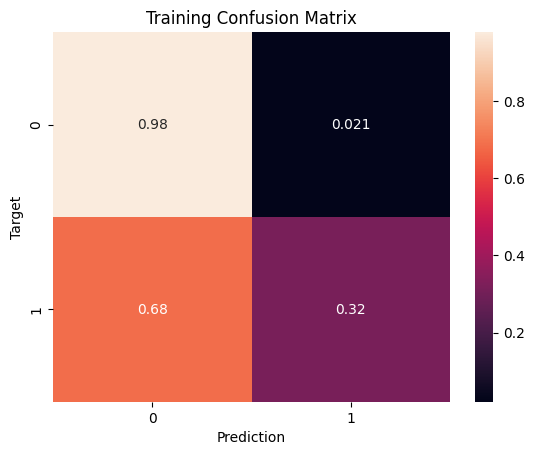

In [115]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 90.00%


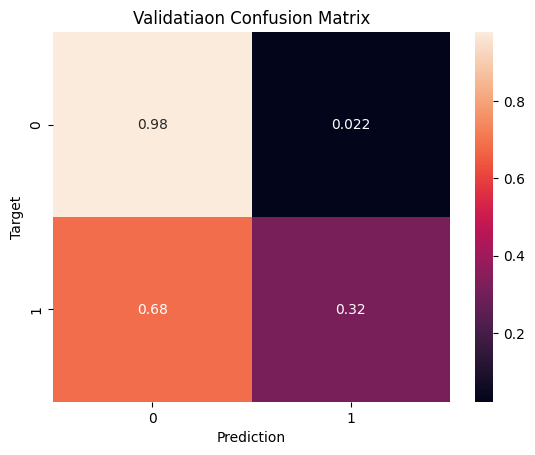

In [116]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 89.89%


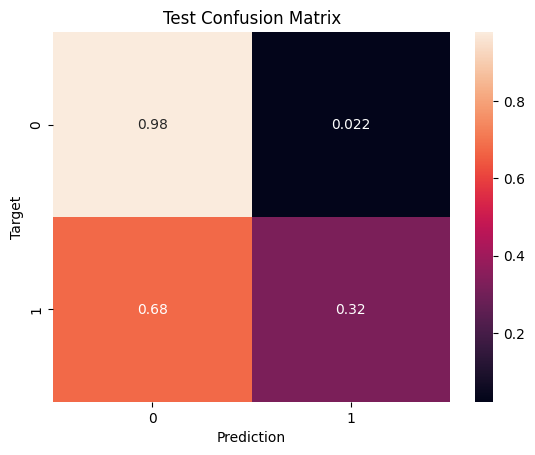

In [117]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')